In [52]:
import pandas as pd
import seaborn as sns

In [53]:
df = pd.read_csv('StudentsPerformance.csv')
df

gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none        72.0           72.0           74.0  
1                 completed        69.0           90.0           88.0  
2                      none        90.0           95.0           93.0  
3                      none        47.0           57.0           44.0  
4                      none        76.0           78.0           75.0  
..                      ...         ...            ...            ...  
995               completed        88.0           99.0           95.0  
996                    none        62.0           55.0           55.0  
997               completed        59.0           71.0           65.0  
998               completed        68.0           78.0           77.0  
999                    none        77.0           86.0           86.0  

[1000 rows x 8 columns]

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   990 non-null    float64
 6   reading score                985 non-null    float64
 7   writing score                989 non-null    float64
dtypes: float64(3), object(5)
memory usage: 62.6+ KB


In [55]:
df.describe()

math score  reading score  writing score
count  990.000000     985.000000     989.000000
mean    66.208081      69.261929      68.142568
std     15.103724      14.634171      15.199780
min      0.000000      17.000000      10.000000
25%     57.000000      59.000000      58.000000
50%     66.000000      70.000000      69.000000
75%     77.000000      80.000000      79.000000
max    100.000000     100.000000     100.000000

In [56]:
df.shape

(1000, 8)

In [57]:
df.size

8000

In [58]:
df = df.fillna(df.mean())

In [59]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
df.head(10)

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   
5  female        group B          associate's degree      standard   
6  female        group B                some college      standard   
7    male        group B                some college  free/reduced   
8    male        group D                 high school  free/reduced   
9  female        group B                 high school  free/reduced   

  test preparation course  math score  reading score  writing score  
0                    none        72.0           72.0           74.0  
1               completed        69.0           90.0           88.0  
2                    none        90.0           95.0           93.0  
3                    none        47.0           57.0           44.0  
4                    none        76.0           78.0           75.0  
5                    none        71.0           83.0           78.0  
6               completed        88.0           95.0           92.0  
7                    none        40.0           43.0           39.0  
8               completed        64.0           64.0           67.0  
9                    none        38.0           60.0           50.0

<AxesSubplot:>

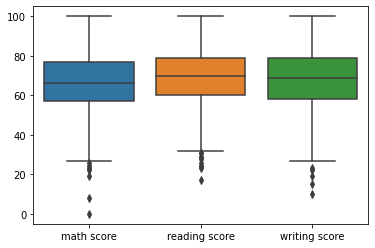

In [61]:
sns.boxplot(data=df)

In [62]:
dfnew=pd.concat([df['math score'], df['reading score'], df['writing score']], axis=1)

In [63]:
dfnew

math score  reading score  writing score
0          72.0           72.0           74.0
1          69.0           90.0           88.0
2          90.0           95.0           93.0
3          47.0           57.0           44.0
4          76.0           78.0           75.0
..          ...            ...            ...
995        88.0           99.0           95.0
996        62.0           55.0           55.0
997        59.0           71.0           65.0
998        68.0           78.0           77.0
999        77.0           86.0           86.0

[1000 rows x 3 columns]

In [38]:
#method used to remove outliers 
#IQR , Zscore etc
#We are using IQR Inter Quantile Range
Q1=dfnew.quantile(0.25) #25 percent of value
Q3=dfnew.quantile(0.75) #75 percent of value
IQR=Q3-Q1
print(IQR)

math score       20.0
reading score    19.0
writing score    21.0
dtype: float64


In [39]:
low=Q1-1.5*IQR
high=Q3+1.5*IQR
print(low,high)

math score       27.0
reading score    31.5
writing score    26.5
dtype: float64 math score       107.0
reading score    107.5
writing score    110.5
dtype: float64


In [40]:
newdf=dfnew[~((dfnew<low)|(dfnew>high)).any(axis=1)]
newdf

math score  reading score  writing score
0          72.0           72.0           74.0
1          69.0           90.0           88.0
2          90.0           95.0           93.0
3          47.0           57.0           44.0
4          76.0           78.0           75.0
..          ...            ...            ...
995        88.0           99.0           95.0
996        62.0           55.0           55.0
997        59.0           71.0           65.0
998        68.0           78.0           77.0
999        77.0           86.0           86.0

[986 rows x 3 columns]

In [41]:
print(dfnew.shape)
print(newdf.shape)

(1000, 3)
(986, 3)


<AxesSubplot:>

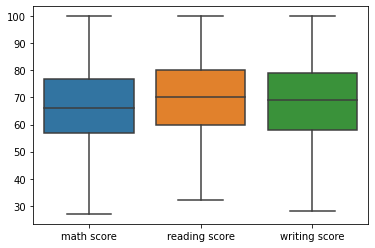

In [42]:
#again checking for outiers
sns.boxplot(data=newdf)

In [43]:
#Normalize it using min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler()
newdf=scaler.fit_transform(newdf)

In [44]:
newdf=pd.DataFrame(newdf,columns=['math','reading','writing'])

In [45]:
newdf

math   reading   writing
0    0.616438  0.588235  0.638889
1    0.575342  0.852941  0.833333
2    0.863014  0.926471  0.902778
3    0.273973  0.367647  0.222222
4    0.671233  0.676471  0.652778
..        ...       ...       ...
981  0.835616  0.985294  0.930556
982  0.479452  0.338235  0.375000
983  0.438356  0.573529  0.513889
984  0.561644  0.676471  0.680556
985  0.684932  0.794118  0.805556

[986 rows x 3 columns]

<AxesSubplot:ylabel='Count'>

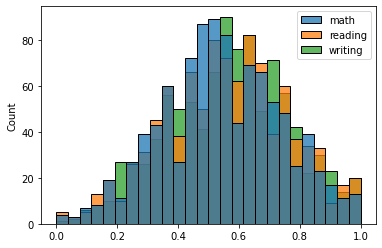

In [46]:
sns.histplot(newdf)

<AxesSubplot:>

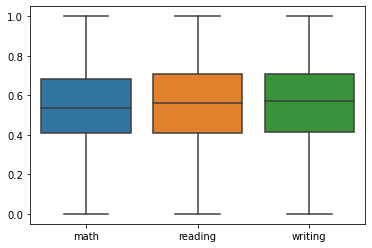

In [48]:
sns.boxplot(data=newdf)

<AxesSubplot:>

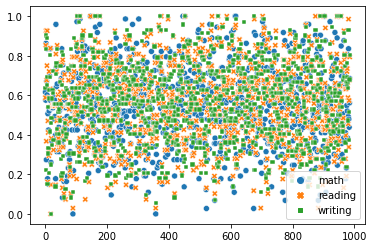

In [51]:
sns.scatterplot(data=newdf)